# Import dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification

Load the data

In [2]:
data = pd.read_csv('Cancer_dataset.csv')

# Exploratory Data Analysis


In [3]:
data.shape

(569, 33)

In [4]:
# drop id and unknown column with NaN values
data.drop(columns = 'Unnamed: 32', axis=1, inplace = True)  
data.drop(columns = 'id', axis=1, inplace = True)
data.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
# check data types and missing values
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
#Statistical summary of data using describe function
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [8]:
# convert categorical data to numerical data
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data['diagnosis'])
data['diagnosis'] = labels
data['diagnosis'].value_counts()


diagnosis
0    357
1    212
Name: count, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

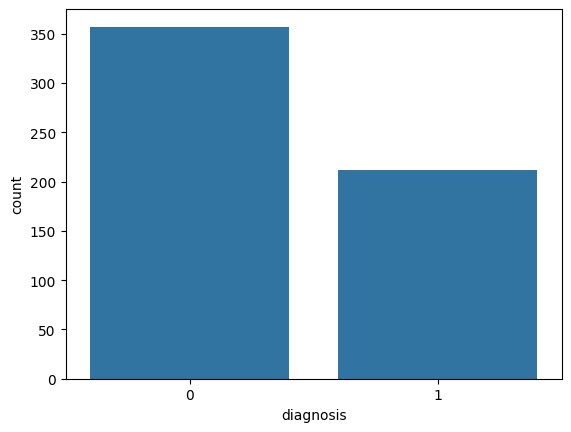

In [9]:
# plotting the diagnosis column
sns.countplot(x='diagnosis', data=data)

In [10]:
# Grouping data by diagnosis and calculating the mean of each feature 
data.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


It's apparent that, for the majority of features, the average values are greater in Malignant cases (denoted by 1) and lower in Benign cases (denoted by 0).

Implementing feature reduction to optimize computing

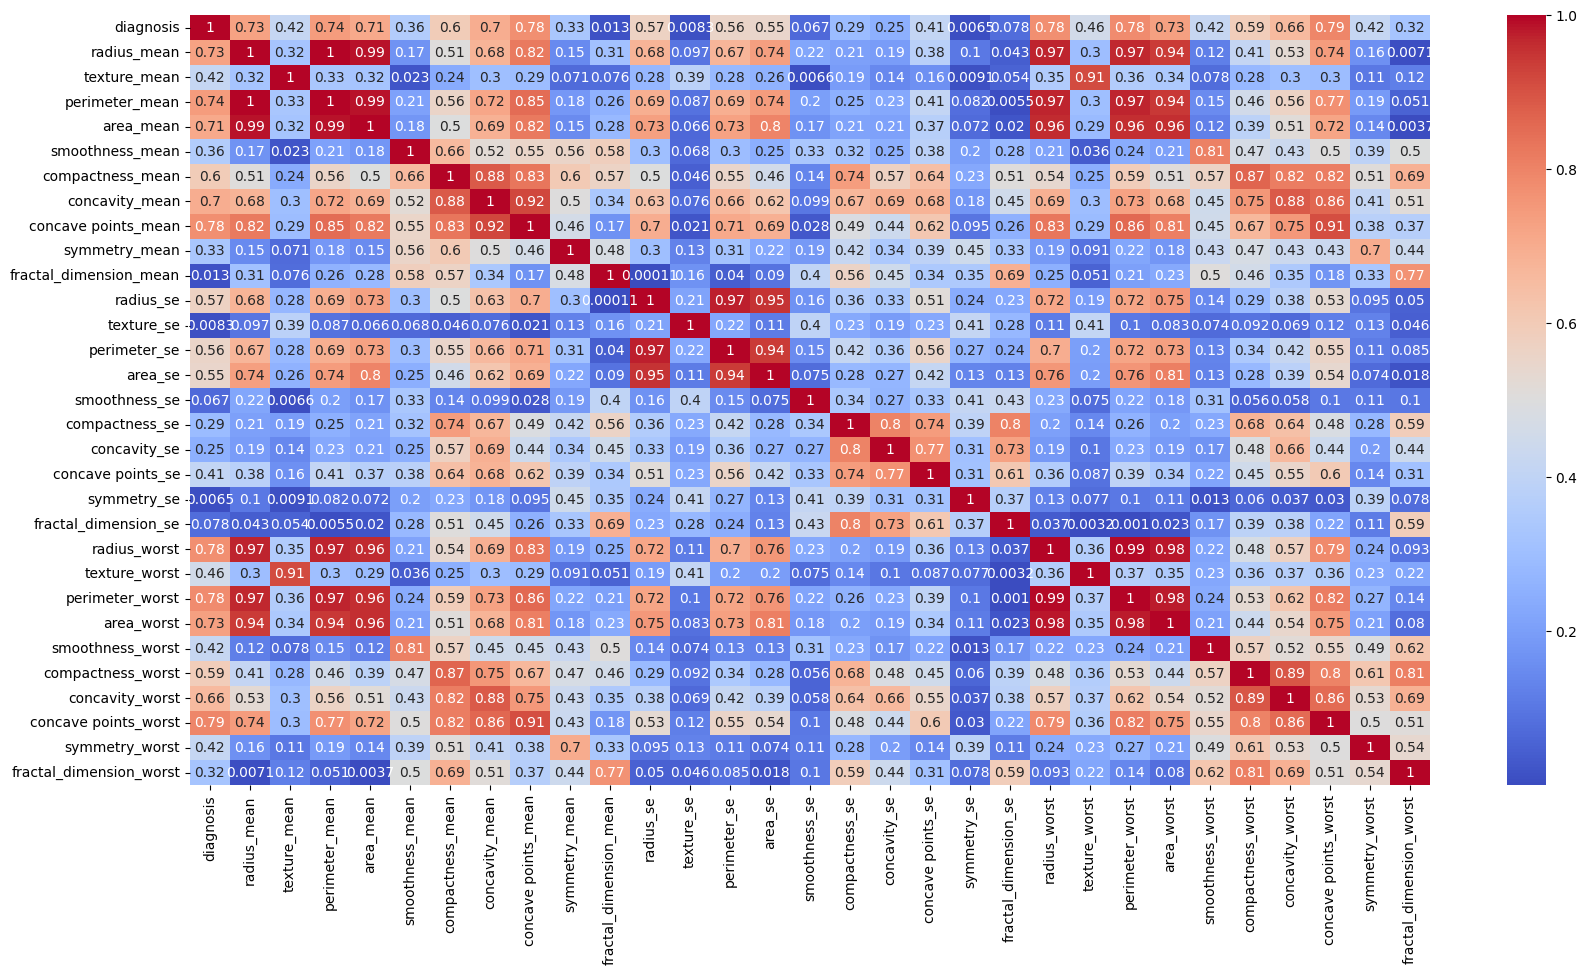

In [11]:
# building a correlation matrix to find features with high correlation 
correlation_matrix = data.corr().abs()
upper_triangle_mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
upper_triangle = correlation_matrix.where(upper_triangle_mask)
threshold = 0.97
# print corelation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.show()


Highly correlated features can introduce multicollinearity into the dataset, which can negatively impact the performance of certain machine learning algorithms

This code Identifies and drops features with a correlation coefficient greater than 0.97 to reduce multicollinearity, thereby improving the model's performance and interpretability. The pair plot helps visualize the relationships between the highly correlated features and the target variable.

Features to drop: ['perimeter_mean', 'area_mean', 'perimeter_se', 'perimeter_worst', 'area_worst']
Number of features to drop: 5


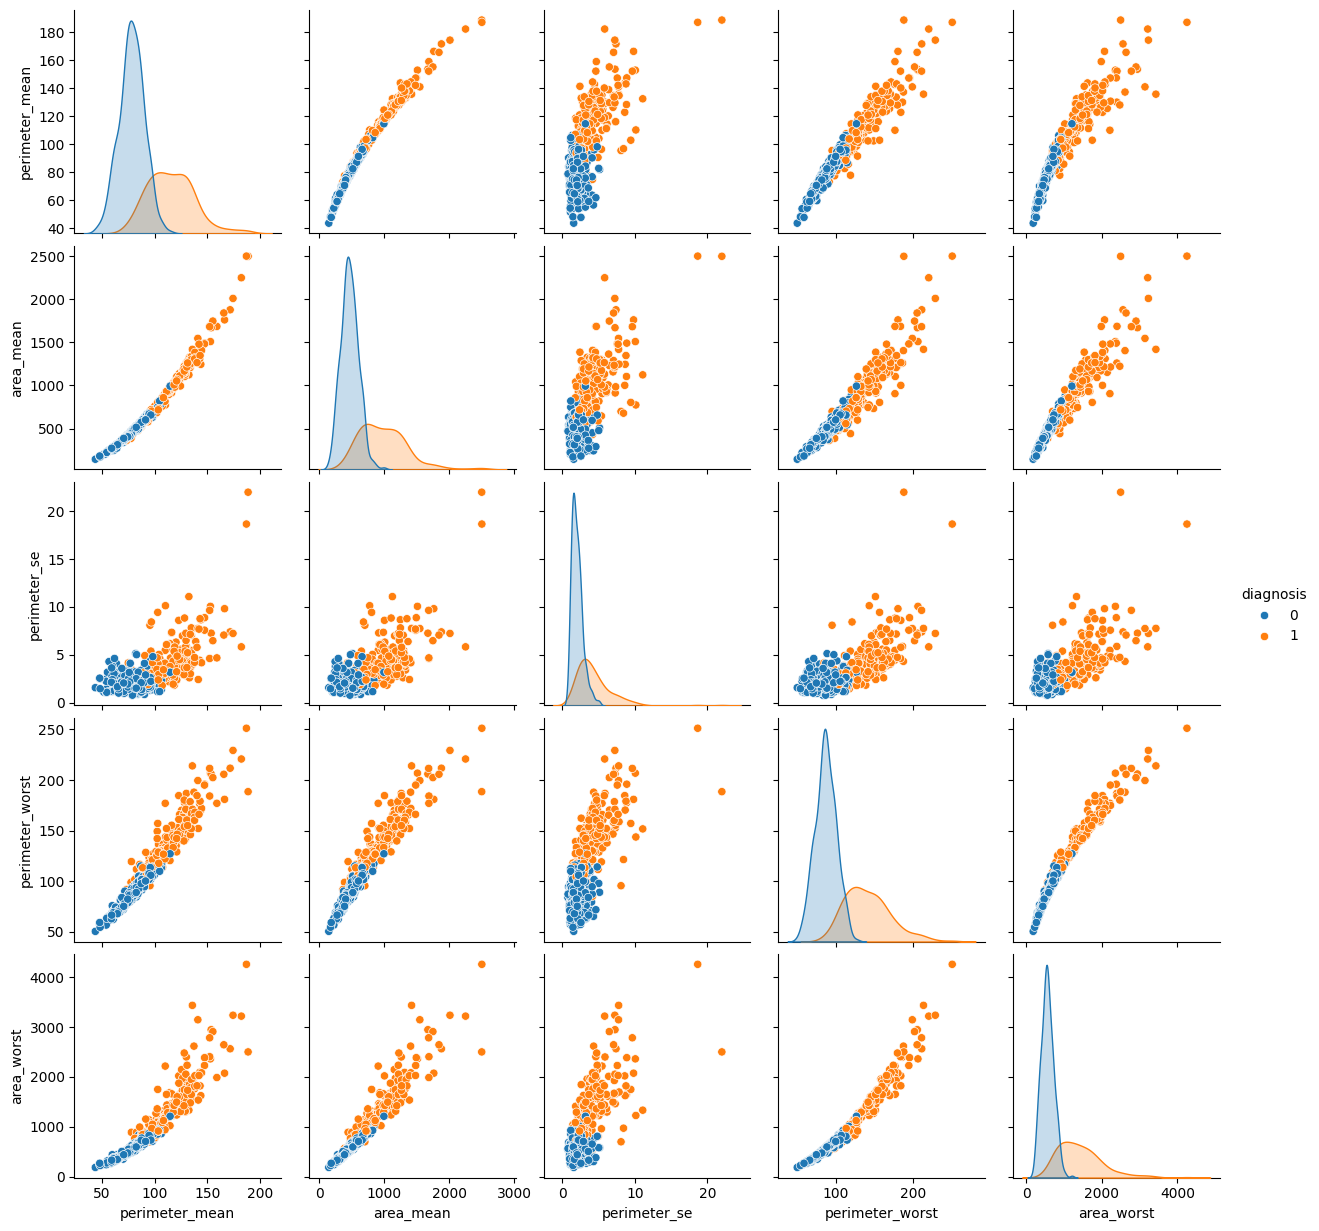

In [12]:
features_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
print("Features to drop:", features_to_drop)
print("Number of features to drop:", len(features_to_drop))

# creating pair plot for the features with high correlation
sns.pairplot(data[features_to_drop + ['diagnosis']], hue='diagnosis')


In [13]:
# drop features with high correlation
data.drop(columns=features_to_drop, inplace=True)

# Neural Networks

In [14]:
# Splitting the data into features and target
X = data.drop(columns='diagnosis', axis=1)
Y = data['diagnosis']

In [15]:
# Standardizing the data

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [16]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(569, 25) (455, 25) (114, 25)


In [17]:
# Setting up the layers of Neural Network
# Adding dropout layers to prevent overfitting

model = Sequential([
                        Flatten(input_shape=(data.shape[1]-1,)),
                        Dense(64, activation='relu'),
                        Dropout(0.2),         
                        Dense(64, activation='sigmoid'),                         
                        Dropout(0.2),
                        Dense(2, activation='softmax')
])

In [18]:
# Compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Training the Neural Network
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=50)

Epoch 1/50
15/15 [==============================] - 1s 14ms/step - loss: 0.8133 - accuracy: 0.6308 - val_loss: 0.5365 - val_accuracy: 0.8333
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.6879 - val_loss: 0.4143 - val_accuracy: 0.9035
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5432 - accuracy: 0.7648 - val_loss: 0.3555 - val_accuracy: 0.9123
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.7692 - val_loss: 0.3395 - val_accuracy: 0.8947
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: 0.4952 - accuracy: 0.7868 - val_loss: 0.3236 - val_accuracy: 0.9123
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4897 - accuracy: 0.7890 - val_loss: 0.3153 - val_accuracy: 0.9035
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4850 - accuracy: 0.7714 - val_loss: 0.3127 - val_accuracy: 0.9035
Epoch 8/50
15/15 [=

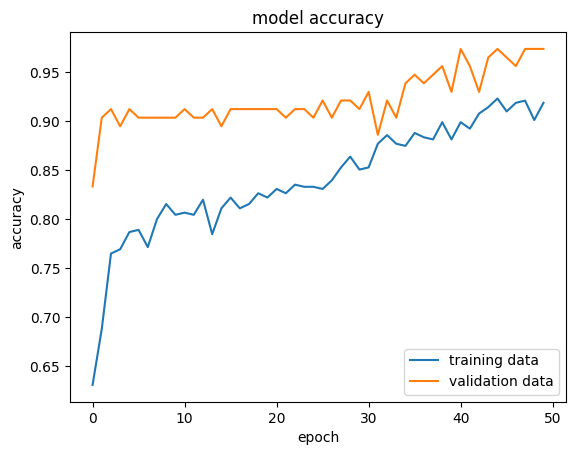

In [20]:
# Evaluating the model through accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

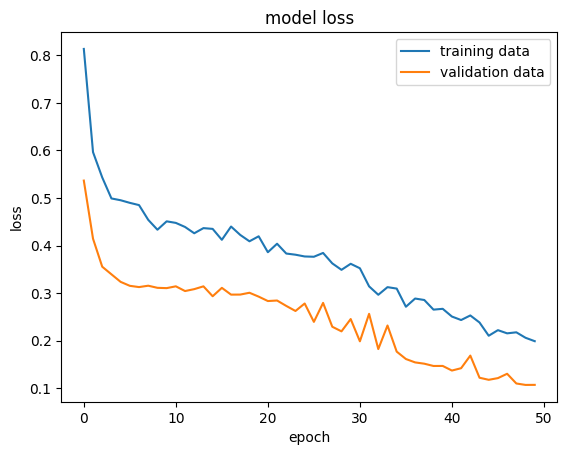

In [21]:
# Evaluating the model through loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

4/4 [==============================] - 0s 0s/step - loss: 0.1071 - accuracy: 0.9737
Accuracy: 97.37%
4/4 [==============================] - 0s 5ms/step


Text(95.72222222222221, 0.5, 'Truth')

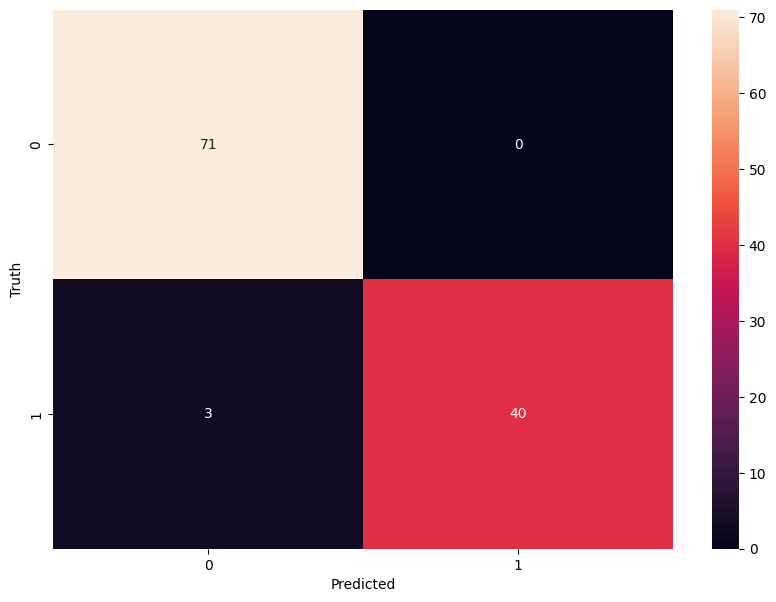

In [22]:

# Evaluating the model on test data
loss, accuracy = model.evaluate(X_test, Y_test)
neural_network_accuracy = accuracy * 100
print(f'Accuracy: {neural_network_accuracy:.2f}%')

# Predictions
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


# Decision Tree

### Splitting the data 

In [23]:
# Splitting the data into features and target 
X = data.drop(columns='diagnosis', axis=1)
Y = data['diagnosis']


# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.50, random_state=42)

### Implemeting Decision Tree classifier

In [24]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [25]:
# Predictions on test and train data
predictions_test = dt.predict(X_test)
predictions_train = dt.predict(X_train)

In [26]:
# Show parameters of Decision Tree
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Train Accuracy: 1.0000
Test Accuracy: 0.9053


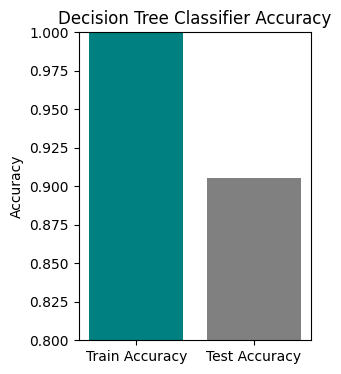

In [27]:
# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(Y_train, predictions_train)
test_accuracy = accuracy_score(Y_test, predictions_test)
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plotting the accuracies
plt.figure(figsize=(3, 4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['teal', 'grey'])
plt.ylim(0.8, 1.0)
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Accuracy')
plt.show()

In [28]:
dt.feature_importances_

array([0.        , 0.        , 0.01449839, 0.        , 0.        ,
       0.02164325, 0.02930857, 0.        , 0.        , 0.01367733,
       0.11345059, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01352703, 0.02352451, 0.031042  , 0.020516  ,
       0.        , 0.        , 0.71881234, 0.        , 0.        ])

<Axes: >

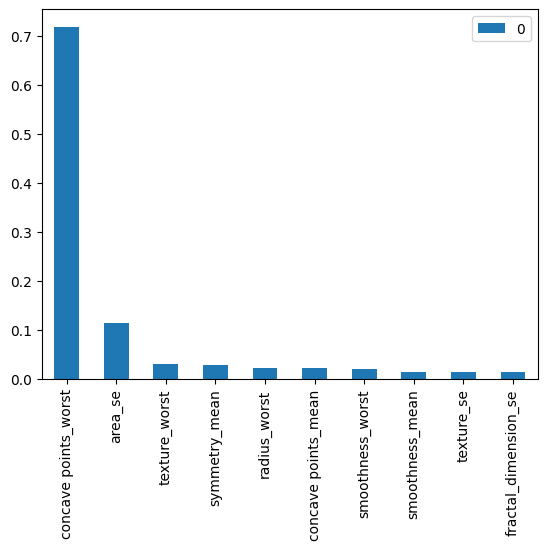

In [29]:
# Plotting the values of feature importance as per the decision tree
feature_importance = pd.DataFrame(dt.feature_importances_, index = X.columns).sort_values(0, ascending=False)
features = list(feature_importance[feature_importance[0]>0].index)
feature_importance.head(10).plot(kind='bar')

### Plotting the decision tree

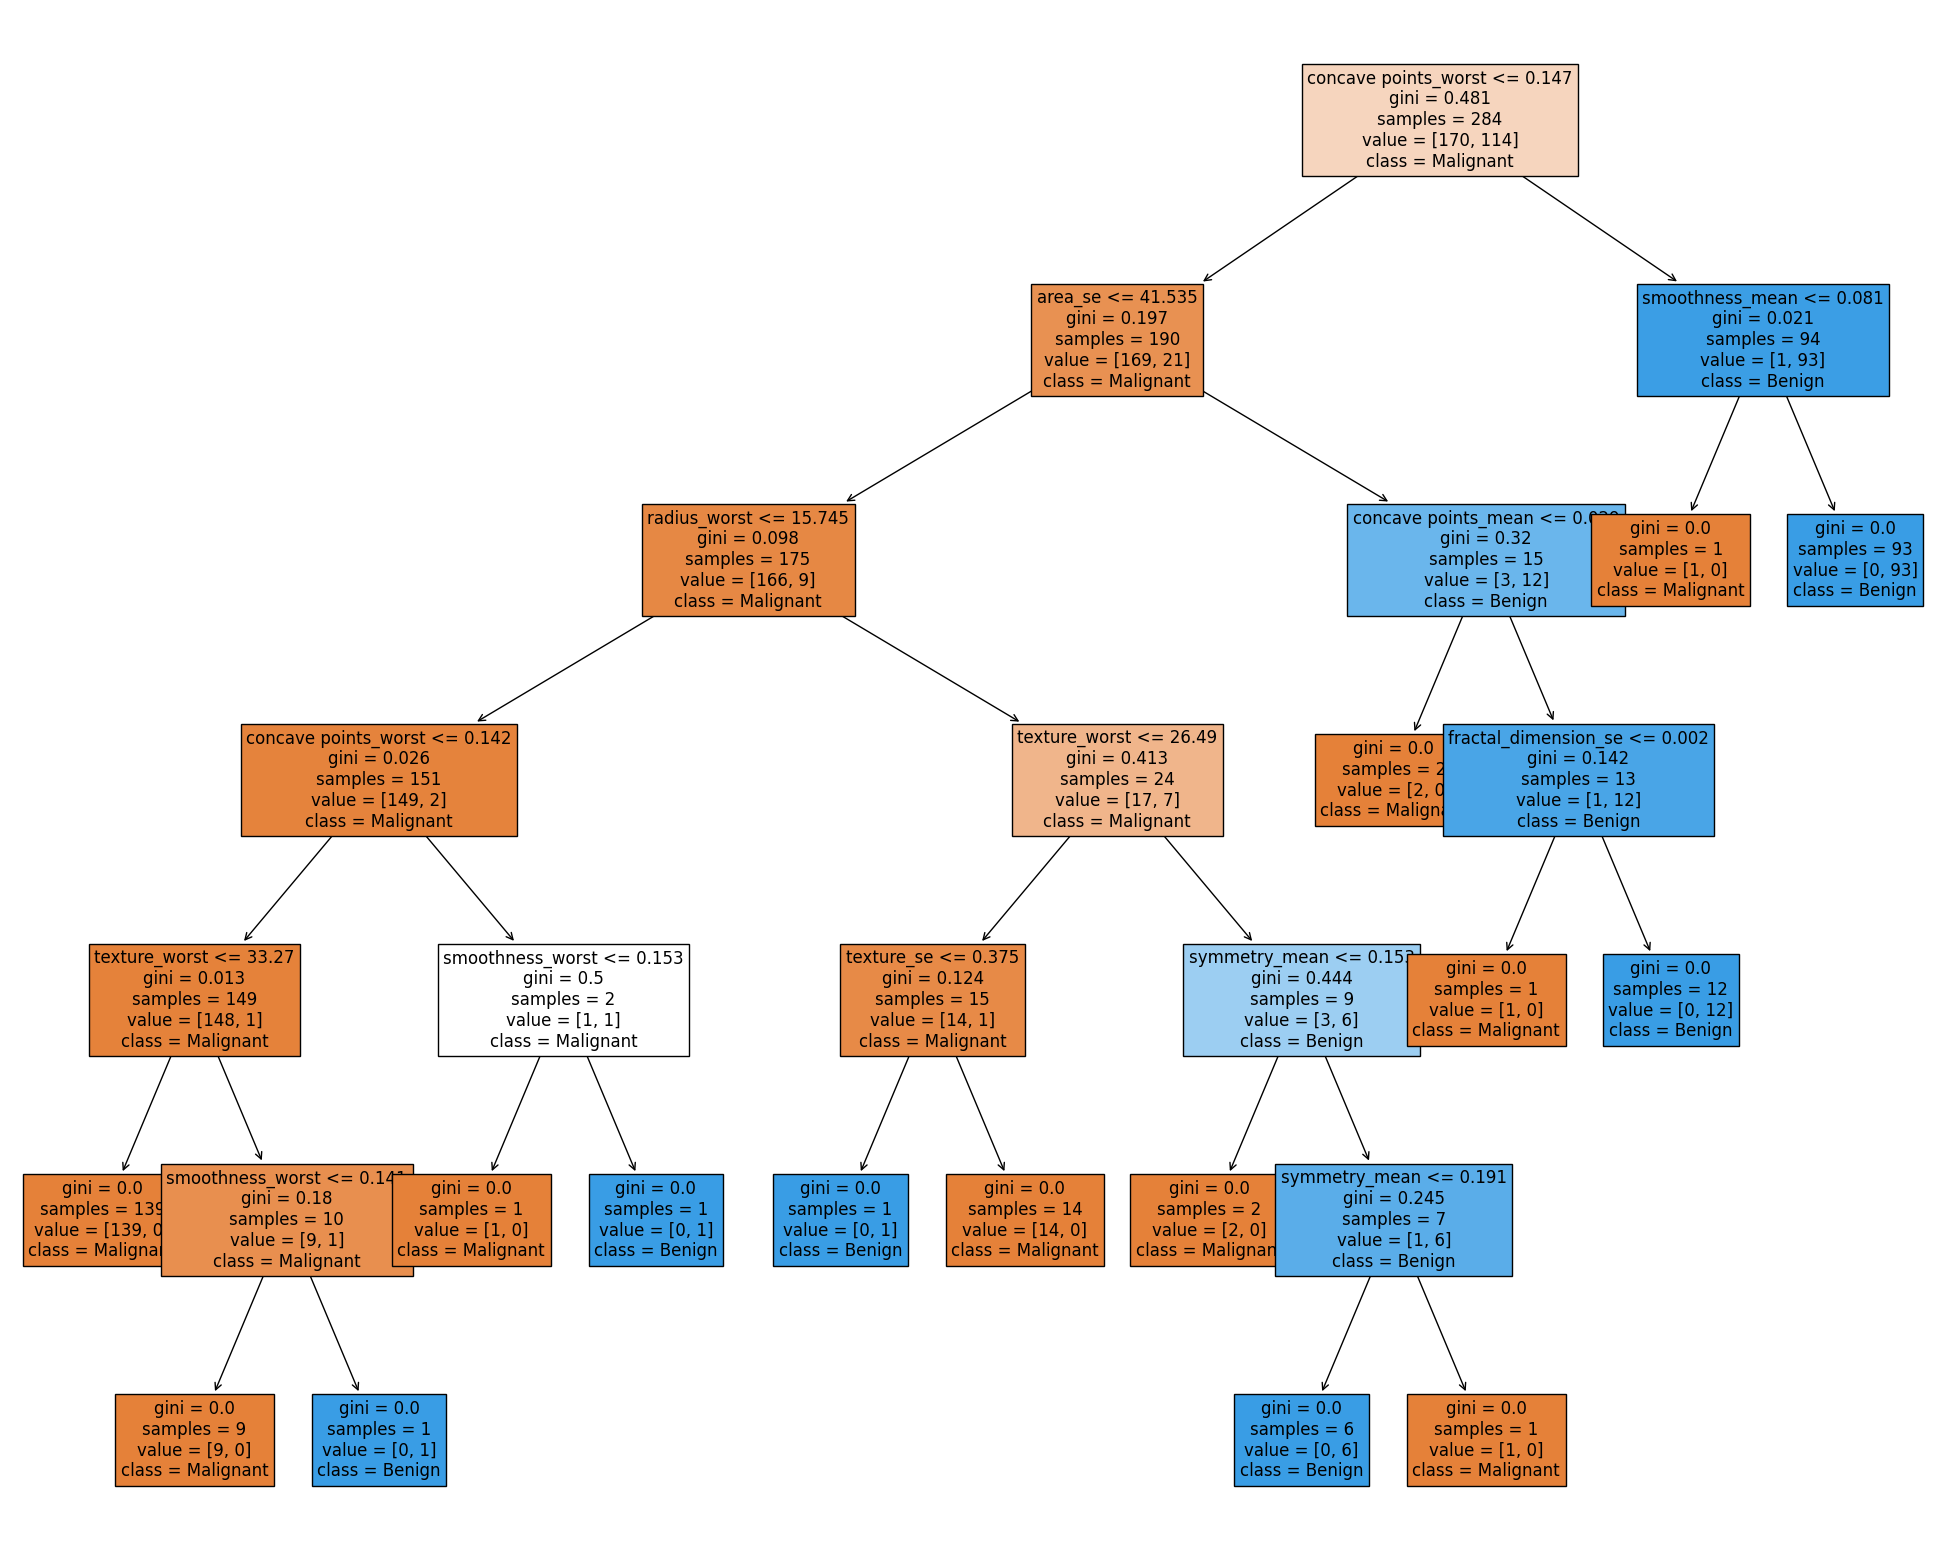

In [30]:

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=X.columns,  
                   class_names={0:'Malignant', 1:'Benign'},
                   filled=True,
                  fontsize=12)

### Pruning the Decsion Tree

I am going to Use Prepruning techinques to avoid overfitting

#### GridSearch CV

First lets list up the parameters we are going to use to preprune for the decision tree classifier

In [31]:
# Hyperparameters for Decision Tree
max_depth = [2,3, 4]
min_samples_split = [2,3,4,5,6]
min_samples_leaf = [1, 2, 4, 5, 6]
max_features = ['auto', 'sqrt', 'log2', None]
criterion = ['entropy']
splitter = ['best', 'random']
class_weight = ['balanced', None]
ccp_alpha = [0.0, 0.01, 0.001, 0.0001]   

Now I will use **GridSearch CV** to decide the best hyperparameters for pre-pruning of Decision Tree

In [32]:
# dt_Pruned = DecisionTreeClassifier()
param_grid = {'max_depth': max_depth,
              
              'min_samples_leaf': min_samples_leaf,
              'max_features': max_features,
              'criterion': criterion,
              'splitter': splitter,
              'class_weight': class_weight,
              'ccp_alpha': ccp_alpha}
gs = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)


In [33]:
gs.fit(X_train, Y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.01, 0.001, 0.0001],
                         'class_weight': ['balanced', None],
                         'criterion': ['entropy'], 'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4, 5, 6],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [34]:
dt_pruned = gs.best_estimator_

In [35]:
dt_pruned.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=3,
                       min_samples_leaf=4, splitter='random')

Train Accuracy: 0.9120
Test Accuracy: 0.9123


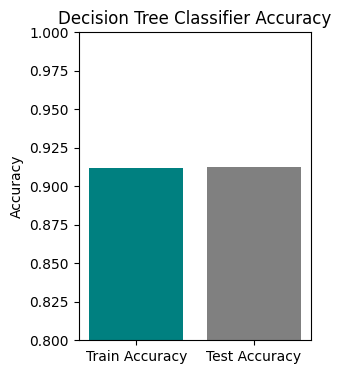

In [36]:

dt_pruned_predictions_test = dt_pruned.predict(X_test)
dt_pruned_predictions_train = dt_pruned.predict(X_train)

dt_pruned_train_accuracy = accuracy_score(Y_train, dt_pruned_predictions_train)
dt_pruned_test_accuracy = accuracy_score(Y_test, dt_pruned_predictions_test)

print(f'Train Accuracy: {dt_pruned_train_accuracy:.4f}')
print(f'Test Accuracy: {dt_pruned_test_accuracy:.4f}')

# Plotting the accuracies
plt.figure(figsize=(3, 4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [dt_pruned_train_accuracy, dt_pruned_test_accuracy], color=['teal', 'grey'])
plt.ylim(0.8, 1.0)
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Accuracy')
plt.show()


Plotting the Important features

<Axes: >

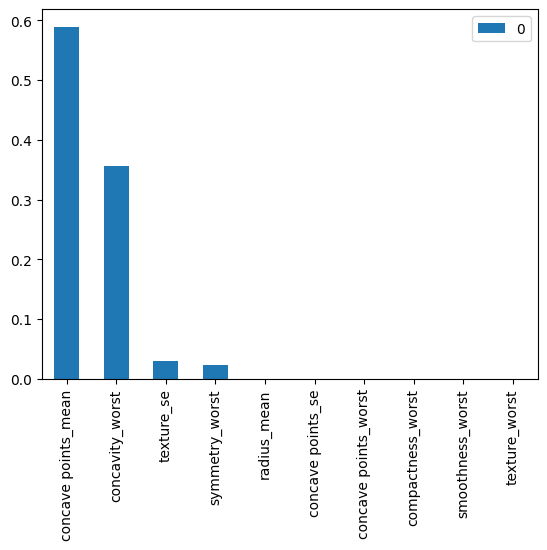

In [37]:
dt_pruned.feature_importances_

# Plotting the values of feature importance as per the decision tree

feature_importance = pd.DataFrame(dt_pruned.feature_importances_, index = X.columns).sort_values(0, ascending=False)
features = list(feature_importance[feature_importance[0]>0].index)
feature_importance.head(10).plot(kind='bar')

### Plotting the decision tree

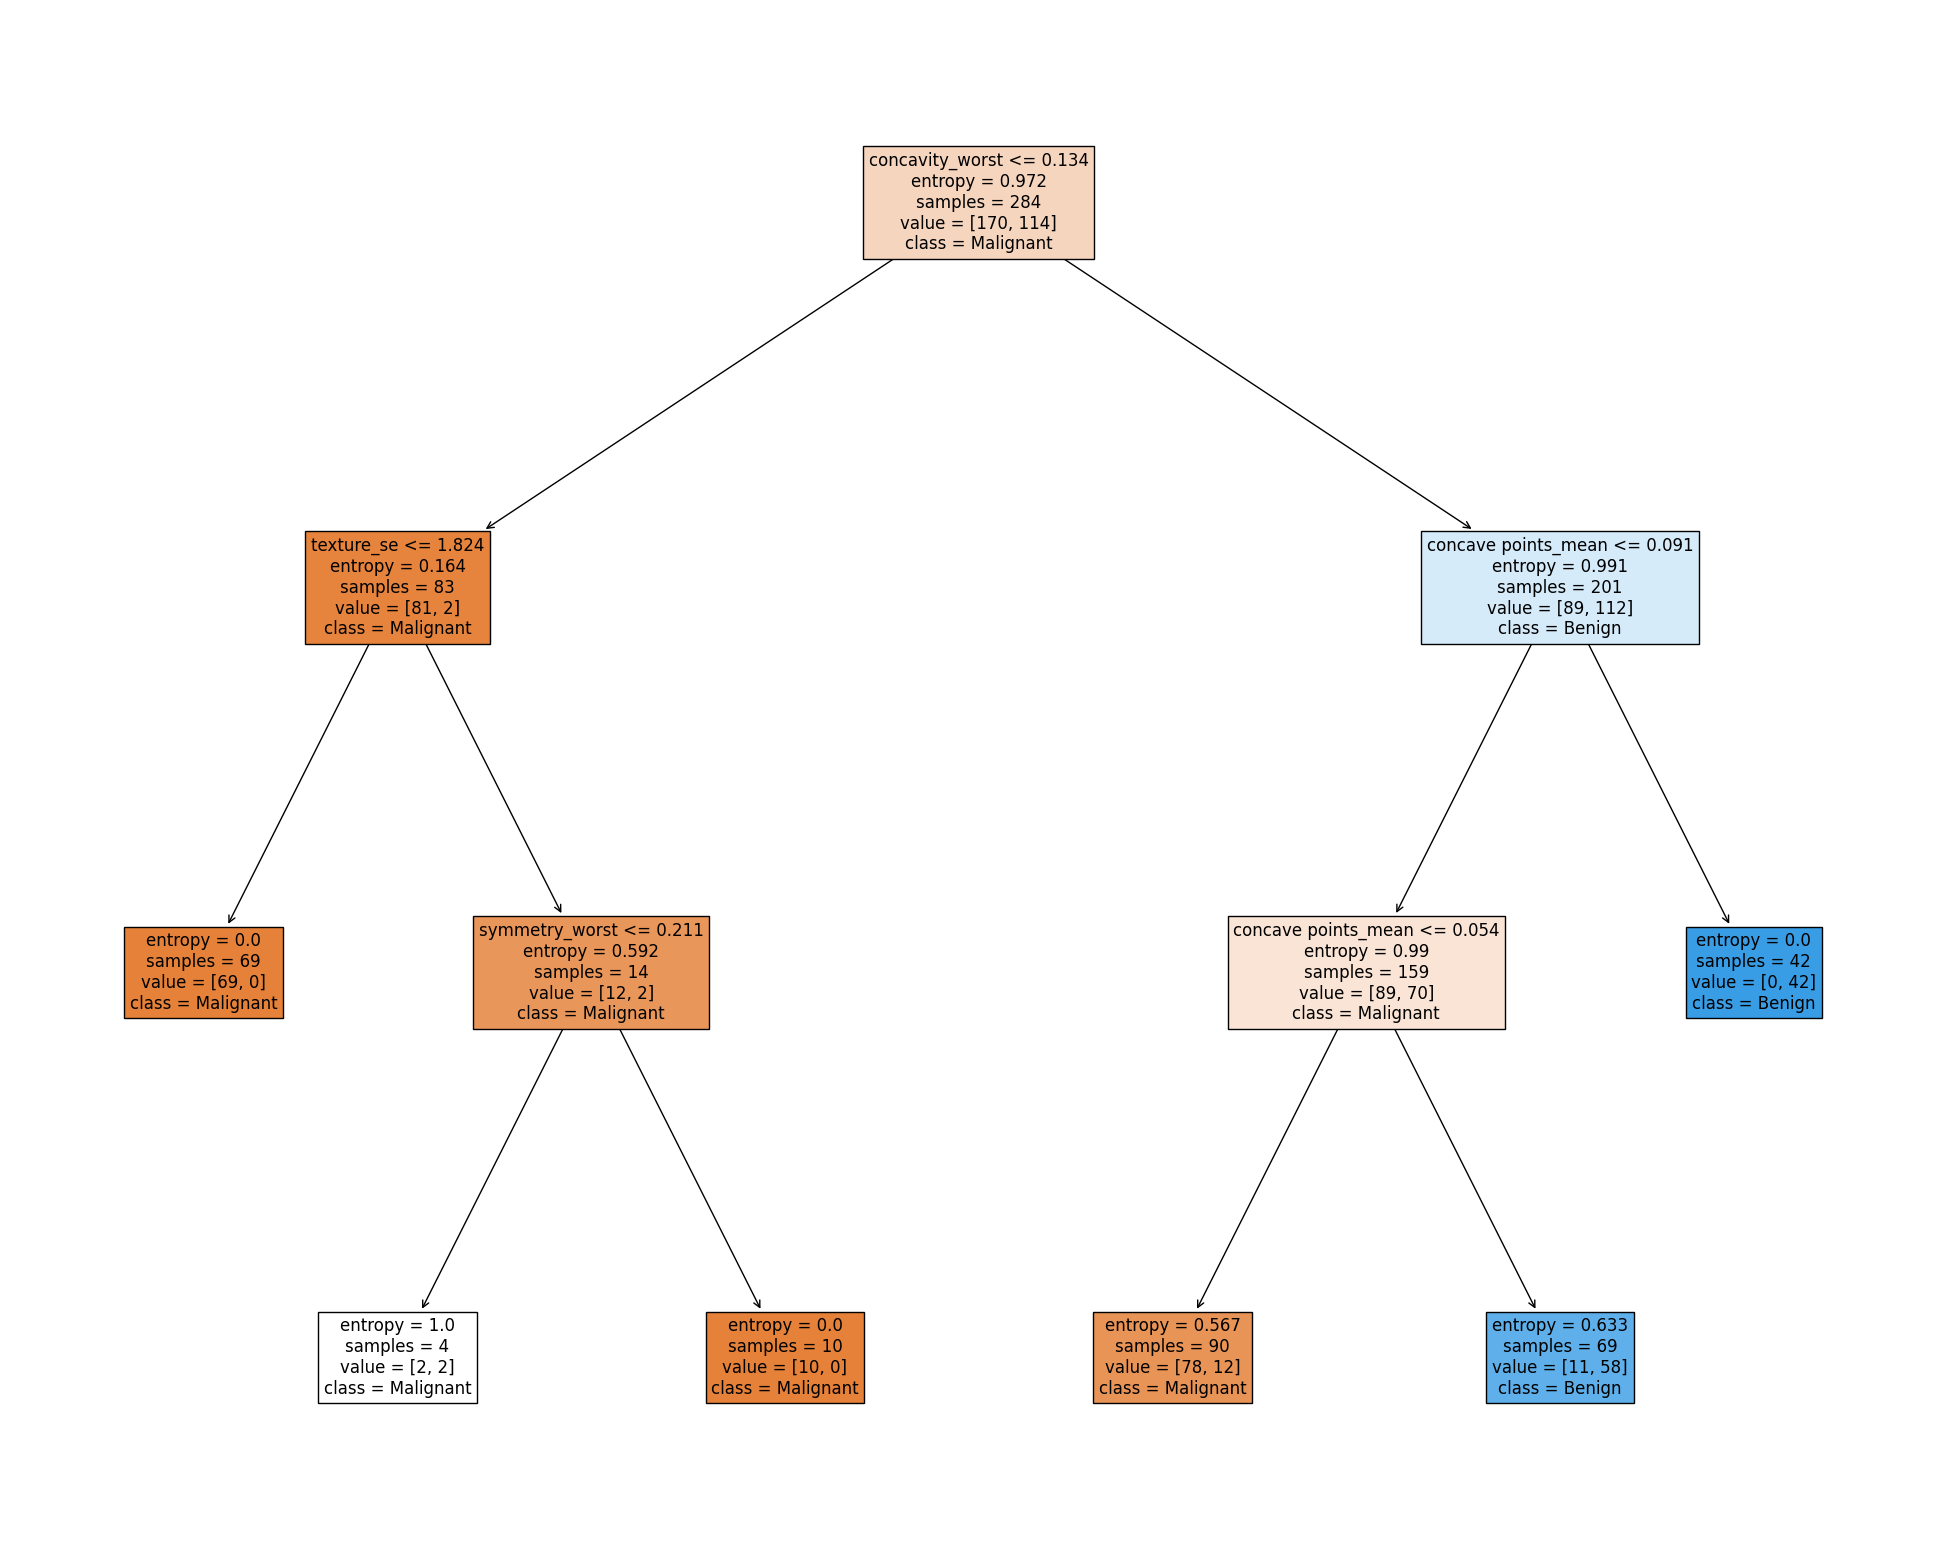

In [38]:

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_pruned, 
                   feature_names=X.columns,  
                   class_names={0:'Malignant', 1:'Benign'},
                   filled=True,
                  fontsize=12)


### Comparing Accuracy pre and post pruning

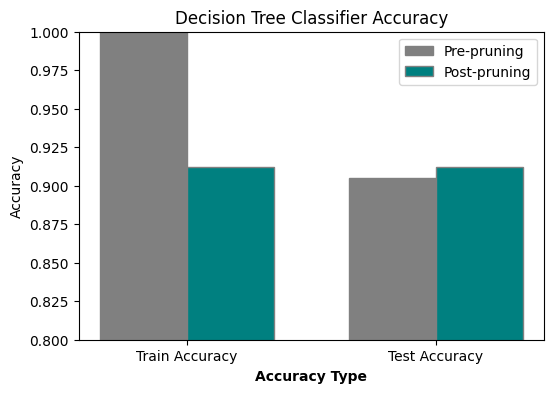

Train Accuracy: 1.0000
Test Accuracy: 0.9053
Train Accuracy post pruning: 0.9120
Test Accuracy post pruning: 0.9123


In [39]:

# Data
pre_pruning_accuracies = [train_accuracy, test_accuracy]
post_pruning_accuracies = [dt_pruned_train_accuracy, dt_pruned_test_accuracy]
labels = ['Train Accuracy', 'Test Accuracy']

# Bar width
bar_width = 0.35

# Positions of the bars on the x-axis
r1 = np.arange(len(pre_pruning_accuracies))
r2 = [x + bar_width for x in r1]

# Plotting the bars
plt.figure(figsize=(6, 4))
plt.bar(r1, pre_pruning_accuracies, color='grey', width=bar_width, edgecolor='grey', label='Pre-pruning')
plt.bar(r2, post_pruning_accuracies, color='teal', width=bar_width, edgecolor='grey', label='Post-pruning')

# Adding labels
plt.xlabel('Accuracy Type', fontweight='bold')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.title('Decision Tree Classifier Accuracy')
plt.xticks([r + bar_width/2 for r in range(len(pre_pruning_accuracies))], labels)
plt.legend()

# Show the plot
plt.show()

# Print accuracies
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Train Accuracy post pruning: {dt_pruned_train_accuracy:.4f}')
print(f'Test Accuracy post pruning: {dt_pruned_test_accuracy:.4f}')
dt_accuracy = dt_pruned_test_accuracy*100;

# Boosting


I am using Gradient Boosting

In [40]:
# Splitting the data into features and target 
X = data.drop(columns='diagnosis', axis=1)
Y = data['diagnosis']


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(max_iter=500)
gb_clf = GradientBoostingClassifier(init=model, n_estimators=1000, learning_rate=0.001, max_depth=3, random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred = gb_clf.predict(X_test)

# Evaluate the model
Boosting_accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy: {Boosting_accuracy:.2f}")

Accuracy: 97.37


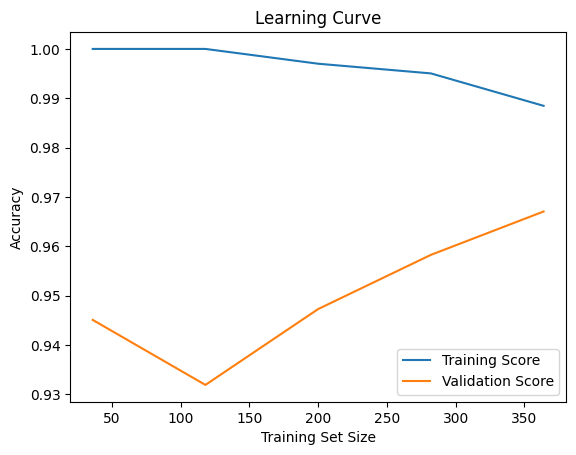

In [42]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(gb_clf, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()


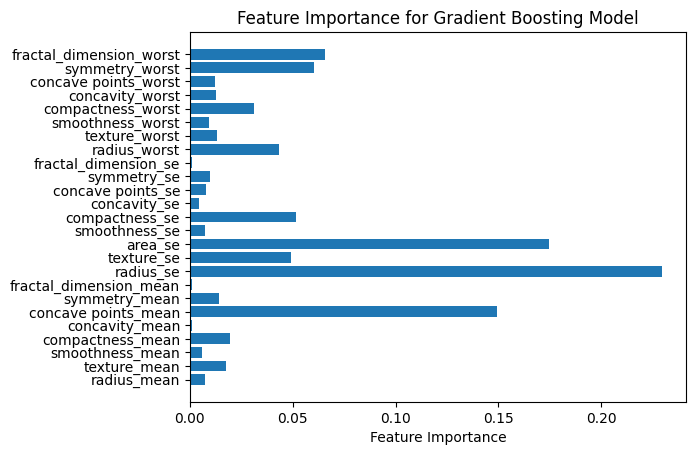

In [43]:
importances = gb_clf.feature_importances_
features = X_train.columns  # Assuming X_train is a DataFrame
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Gradient Boosting Model")
plt.show()

# KNN

In [44]:
# Splitting the data into features and target
X = data.drop(columns='diagnosis', axis=1)
Y = data['diagnosis']

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Train Accuracy: 0.9319
Test Accuracy: 0.9211


c:\anaconda3\envs\info6105\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\anaconda3\envs\info6105\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

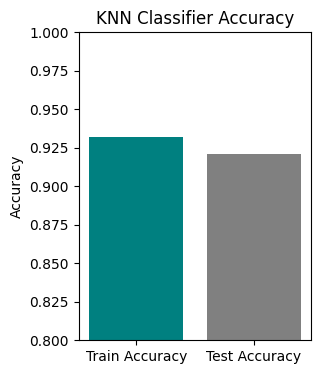

In [45]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

# Predictions on test and train data
predictions_test = knn.predict(X_test)
predictions_train = knn.predict(X_train)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(Y_train, predictions_train)
test_accuracy = accuracy_score(Y_test, predictions_test)
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plotting the accuracies
plt.figure(figsize=(3, 4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['teal', 'grey'])
plt.ylim(0.8, 1.0)
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy')
plt.show()





Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Train Accuracy: 1.0000
Test Accuracy: 0.9561


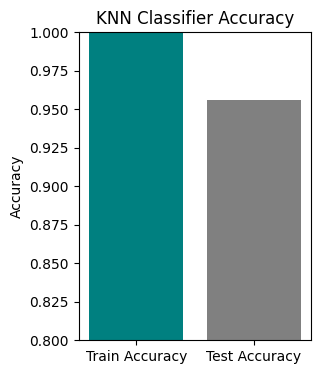

In [46]:
# Hyperparameters for KNN
n_neighbors = [3, 5, 7, 9, 11]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [10, 20, 30, 40, 50]
p = [1, 2]

param_grid = {'n_neighbors': n_neighbors,
                'weights': weights,
                'algorithm': algorithm,
                'leaf_size': leaf_size,
                'p': p}

gs = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
gs.fit(X_train, Y_train)

knn_best = gs.best_estimator_

knn_best.fit(X_train, Y_train)

knn_best_predictions_test = knn_best.predict(X_test)
knn_best_predictions_train = knn_best.predict(X_train)

knn_best_train_accuracy = accuracy_score(Y_train, knn_best_predictions_train)
knn_best_test_accuracy = accuracy_score(Y_test, knn_best_predictions_test)

print(f'Train Accuracy: {knn_best_train_accuracy:.4f}')
print(f'Test Accuracy: {knn_best_test_accuracy:.4f}')

# Plotting the accuracies
plt.figure(figsize=(3, 4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [knn_best_train_accuracy, knn_best_test_accuracy], color=['teal', 'grey'])
plt.ylim(0.8, 1.0)
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy')
plt.show()


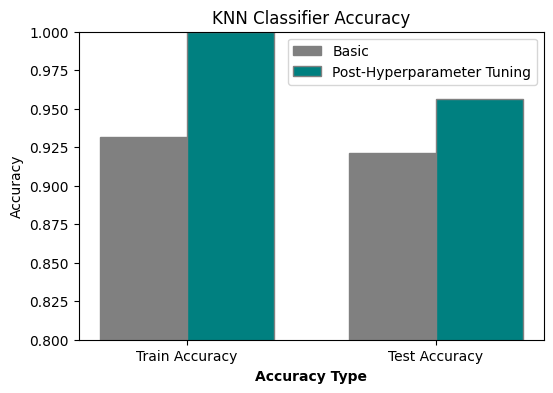

Train Accuracy: 0.9319
Test Accuracy: 0.9211
Train Accuracy post Hyperparameter Tuning: 1.0000
Test Accuracy post Hyperparameter Tuning: 0.9561


In [47]:

# Data
pre_pruning_accuracies = [train_accuracy, test_accuracy]
post_pruning_accuracies = [knn_best_train_accuracy, knn_best_test_accuracy]
labels = ['Train Accuracy', 'Test Accuracy']

# Bar width
bar_width = 0.35

# Positions of the bars on the x-axis
r1 = np.arange(len(pre_pruning_accuracies))
r2 = [x + bar_width for x in r1]

# Plotting the bars
plt.figure(figsize=(6, 4))
plt.bar(r1, pre_pruning_accuracies, color='grey', width=bar_width, edgecolor='grey', label='Basic')
plt.bar(r2, post_pruning_accuracies, color='teal', width=bar_width, edgecolor='grey', label='Post-Hyperparameter Tuning')

# Adding labels
plt.xlabel('Accuracy Type', fontweight='bold')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.title('KNN Classifier Accuracy')
plt.xticks([r + bar_width/2 for r in range(len(pre_pruning_accuracies))], labels)
plt.legend()


# Show the plot
plt.show()

# Print accuracies
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Train Accuracy post Hyperparameter Tuning: {knn_best_train_accuracy:.4f}')
print(f'Test Accuracy post Hyperparameter Tuning: {knn_best_test_accuracy:.4f}')
knn_accuracy = knn_best_test_accuracy*100

In [48]:
Y_train.head()

68     0
181    1
63     0
248    0
60     0
Name: diagnosis, dtype: int32

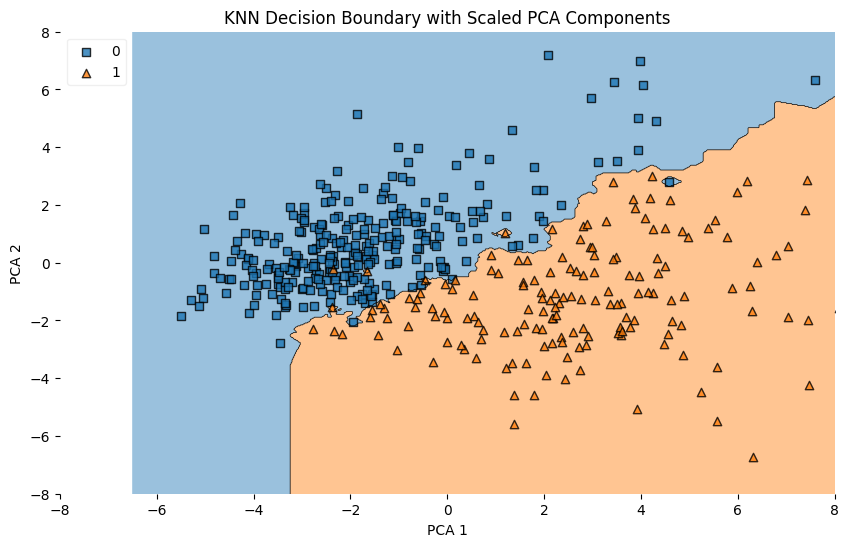

In [49]:

from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA


# Step 1: Standardize the data before PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Apply PCA on scaled data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 3: Train KNN on PCA-transformed data
knn_best.fit(X_train_pca, Y_train)

# Step 4: Plot decision boundary with custom axis limits
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_pca, Y_train.values, clf=knn_best, legend=2)
plt.xlim(-8, 8)  # Set appropriate limits based on PCA-transformed data
plt.ylim(-8, 8)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KNN Decision Boundary with Scaled PCA Components')
plt.show()


# SVM

In [50]:
# Splitting the data into features and target
X = data.drop(columns='diagnosis', axis=1)
Y = data['diagnosis']

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Train Accuracy: 0.9648
Test Accuracy: 0.9561


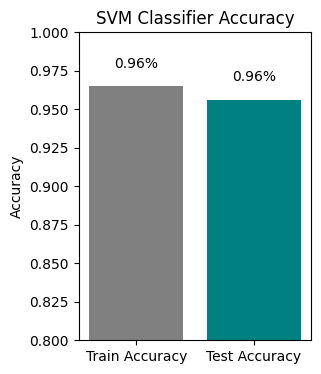

In [ ]:
# implement Support vector machine
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)

# Predictions on test and train data
predictions_test = svm.predict(X_test)
predictions_train = svm.predict(X_train)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(Y_train, predictions_train)
test_accuracy = accuracy_score(Y_test, predictions_test)
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plotting the accuracies
plt.figure(figsize=(3, 4))
bars=plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['grey', 'teal'])
plt.ylim(0.80, 1.00)
plt.ylabel('Accuracy')
plt.title('SVM Classifier Accuracy')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.2f}%', ha='center', va='bottom')

plt.show()


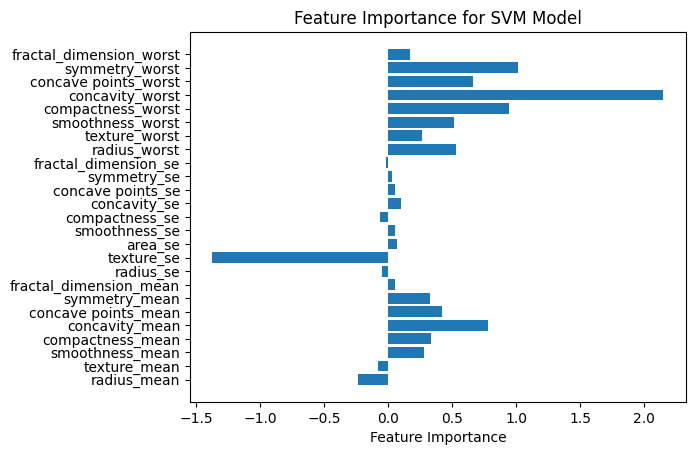

In [102]:
#plot important features
importances = svm.coef_[0]
features = X_train.columns
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance for SVM Model")
plt.show()


Train Accuracy with Top 2 Features: 0.8527
Test Accuracy with Top 2 Features: 0.8333


c:\anaconda3\envs\info6105\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


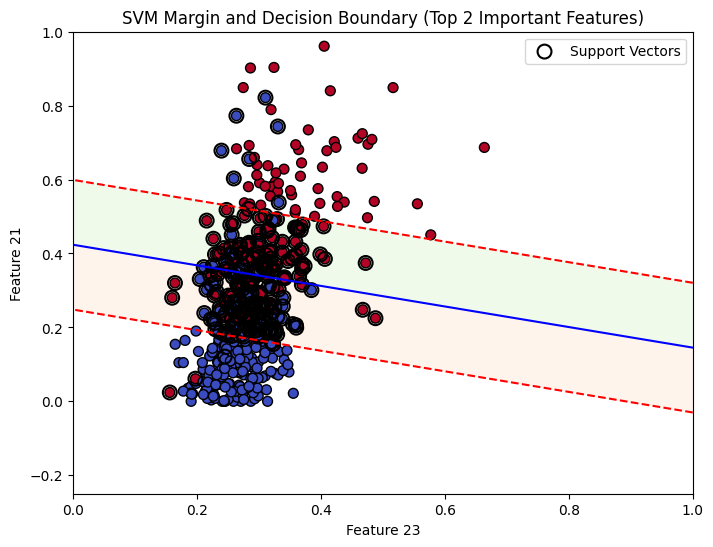

In [194]:


# Assuming `importances` is already computed from a linear SVM model
top2 = np.argsort(importances)[-2:]
X_top2_train = X_train.iloc[:, top2]
X_top2_test = X_test.iloc[:, top2]

# Train SVM on the top 2 features
svm_top2 = SVC(kernel='linear')
svm_top2.fit(X_top2_train, Y_train)

# Predictions
predictions_test_top2 = svm_top2.predict(X_top2_test)
predictions_train_top2 = svm_top2.predict(X_top2_train)

# Accuracy
train_accuracy_top2 = accuracy_score(Y_train, predictions_train_top2)
test_accuracy_top2 = accuracy_score(Y_test, predictions_test_top2)
print(f'Train Accuracy with Top 2 Features: {train_accuracy_top2:.4f}')
print(f'Test Accuracy with Top 2 Features: {test_accuracy_top2:.4f}')

# Visualize the decision boundary
x_min, x_max = X_top2_train.iloc[:, 0].min() - 1, X_top2_train.iloc[:, 0].max() + 1
y_min, y_max = X_top2_train.iloc[:, 1].min() - 1, X_top2_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = svm_top2.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, colors=['#FFDDC1', '#D0F0C0', '#FFDDC1'])
plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['red', 'blue', 'red'], linestyles=['--', '-', '--'])

plt.scatter(X_top2_train.iloc[:, 0], X_top2_train.iloc[:, 1], c=Y_train, cmap='coolwarm', edgecolors='k', s=50)
plt.scatter(svm_top2.support_vectors_[:, 0], svm_top2.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k', linewidths=1.5, label="Support Vectors")

plt.xlabel(f"Feature {top2[0]}")
plt.ylabel(f"Feature {top2[1]}")
plt.title("SVM Margin and Decision Boundary (Top 2 Important Features)")
plt.ylim(-0.25, 1.0)
plt.xlim(-0, 1)
plt.legend()
plt.show()


Test Accuracy for linear kernel: 0.9561
Test Accuracy for poly kernel: 0.9474
Test Accuracy for rbf kernel: 0.9474
Test Accuracy for sigmoid kernel: 0.6930


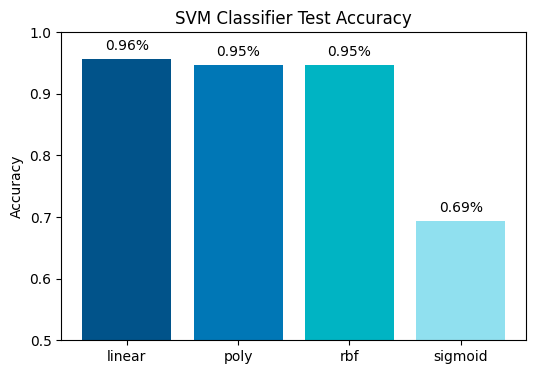

In [195]:
# SVM Test accuracy with 4 different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
test_accuracies = []

for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, Y_train)
    predictions_test = svm.predict(X_test)
    test_accuracy = accuracy_score(Y_test, predictions_test)
    test_accuracies.append(test_accuracy)
    print(f'Test Accuracy for {kernel} kernel: {test_accuracy:.4f}')

plt.figure(figsize=(6, 4))
bars = plt.bar(kernels, test_accuracies, color=['#01538A', '#0077B6', '#00B4c3', '#90E0EF'])
plt.ylim(0.50, 1.0)
plt.ylabel('Accuracy')
plt.title('SVM Classifier Test Accuracy')

# Add accuracy labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.2f}%', ha='center', va='bottom')

plt.show()

#Using best accuracy for comparison of models
svm_accuracy = max(test_accuracies)*100

# Comparing Algorithms


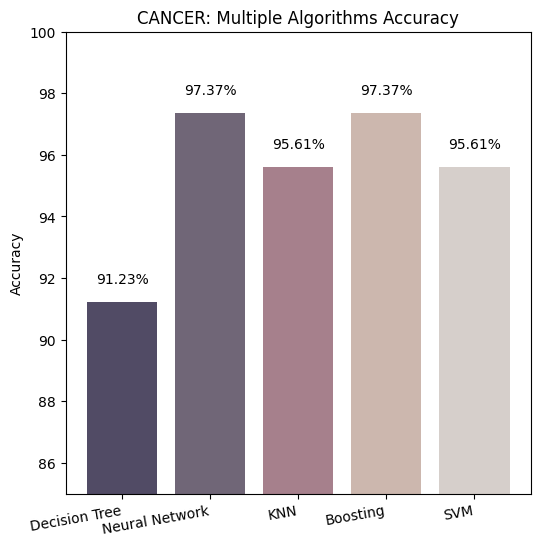

In [202]:
plt.figure(figsize=(6, 6))
bars = plt.bar(['Decision Tree', 'Neural Network', 'KNN', 'Boosting', 'SVM'], 
               [dt_accuracy, neural_network_accuracy, knn_accuracy, Boosting_accuracy, svm_accuracy], 
               color=['#514B65', '#706677', '#A6808C', '#CCB7AE','#D6CFCB'])
plt.ylim(85, 100)
plt.ylabel('Accuracy')
plt.title('CANCER: Multiple Algorithms Accuracy')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom')
plt.xticks(rotation=10, ha='right')
plt.show()
